# Data Sci Eng Methods 
## Assignment 1 – ML Data Cleaning and Feature Selection

*ML Data Cleaning and Feature Selection*

In this assignment, you will use a dataset for predictive learning and check the quality of the data and determine which features are important.

Answer the following questions:

 

* What are the data types? (Only numeric and categorical)

* Are there missing values?

* What are the likely distributions of the numeric variables?

* Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

* Which independent variables have missing data? How much? 

* Do the training and test sets have the same data?

* In the predictor variables independent of all the other predictor variables?

* Which predictor variables are the most important?

* Do the ranges of the predictor variables make sense?

* What are the distributions of the predictor variables?   

* Remove outliers and keep outliers (does if have an effect of the final predictive model)?

* Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

For categorical data, calculate the accuracy and a confusion matrix.

 

Imputation Methods for Missing Data
https://www.youtube.com/watch?v=fYhr8eF1ubo (Links to an external site.)

Nice EDA notebook https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python (Links to an external site.)

 
*Scoring Rubric*  
 

* Are my answers supported with data? (20 Points)   

Tables, graphs, and charts must support your evaluation/answers.

It MUST run in Google Collab. You will also save the Google Collab notebook as a .ipynb notebook and upload that to Canvas . (5 Points)

 

* Public dataset (5 Points)  

Pick a public dataset that can be used for Regression or Classification. You MUST get approval for your dataset from the TAs.

 

* What code is yours and what have you adapted? (5 Points)   

You must explain what code you wrote and what you have done that is different. Failure to cite ANY code will result in a zero for this section.



* Did I explain my code clearly? (15 Points) 

Your code review score will be scaled to a range of 0 to 10 and be used for this score.

 
* Did I explain my licensing clearly? (5 Points)  

Failure to cite a clear license will result in a zero for this section.

 
* Answers to listed questions (45 Points)  

 

* Which independent variables are useful to predict a target (dependent variable)?

* Which independent variable have missing data? How much? 

* Do the training and test sets have the same data?

* In the predictor variables independent of all the other predictor variables?

* Which predictor variables are the most important?

* Do the ranges of the predictor variables make sense?

* What are the distributions of the predictor variables?   

 

Notes:

 

Normality - When we talk about normality what we mean is that the data should look like a normal distribution. This is important because several statistic tests rely on this (e.g. t-statistics). In this exercise we'll just check univariate normality for 'SalePrice' (which is a limited approach). Remember that univariate normality doesn't ensure multivariate normality (which is what we would like to have), but it helps. Another detail to take into account is that in big samples (>200 observations) normality is not such an issue. However, if we solve normality, we avoid a lot of other problems (e.g. heteroscedacity) so that's the main reason why we are doing this analysis.

Homoscedasticity - I just hope I wrote it right. Homoscedasticity refers to the 'assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s)' (Hair et al., 2013) (Links to an external site.). Homoscedasticity is desirable because we want the error term to be the same across all values of the independent variables.

Linearity- The most common way to assess linearity is to examine scatter plots and search for linear patterns. If patterns are not linear, it would be worthwhile to explore data transformations. However, we'll not get into this because most of the scatter plots we've seen appear to have linear relationships.

Absence of correlated errors - Correlated errors, like the definition suggests, happen when one error is correlated to another. For instance, if one positive error makes a negative error systematically, it means that there's a relationship between these variables. This occurs often in time series, where some patterns are time related. We'll also not get into this. However, if you detect something, try to add a variable that can explain the effect you're getting. That's the most common solution for correlated errors.

# Abstract

Abalones are sea snails found world-wide, shell fish which is rich in Vitamin B12 and Iron. The age of an abalone can be determined by counting the number of shell layers that is rings present. The aim of the Notebook is to check the quality of the data and determine which features are important. The notebook has used statistical methods like p-value, t-statistics and visualization techniques like histogram, Q-Q plot, scatter plot, box-plot of python's matplotlib and seaborn library to answer below questions about the dataset
<br>•	Which independent variables are useful to predict a target (dependent variable)?
<br>•	Which independent variables have missing data? How much
<br>•	Do the training and test sets have the same data?
<br>•	In the predictor variables independent of all the other predictor variables?
<br>•	Which predictor variables are the most important?
<br>•	Do the ranges of the predictor variables make sense?
<br>•	What are the distributions of the predictor variables?
<br>Overall, the data looks clean and there are no missing and inconsistent values. The significance of the predictors is investigated and it appears that all independent variables are significant except one, these results can be used to further optimize the model for predicting abalone's age and give better predictions

## Data Set
The data set consists of :
1. 8 physical characteristics of abalones i.e. sex, length, diameter, height, whole weight, shucked weight, viscera weight, shell weight - The independent variables
2. The number of shell rings - The dependent variable  
3. The number of rings ranges from 1 to 29.
4. There are a total of 4177 observations. 

In [1]:
#installing dependencies
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 1.6 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 1.1 MB/s eta 0:00:00a 0:00:01
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=6be6e5de86b96ac8924636cf610161a6b4ee94ae52aa2a79d3c43a7774bc1a92
  Stored in directory: /Users/bear/Library/Caches/pip/wheels/85/ac/25/ffcd87ef8f9b1eec324fdf339359be71f22612459d8c75d89c
Successfully built eli5


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot

In [3]:
#Reading the ablone dataset
data = pd.read_csv("abalone.csv")

In [4]:
#Viewing data in the file 
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
#checking if the any data is missing
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

No data is missing from any of the columns, which means it is not required to impute or remove the null values from the data

<Figure size 576x360 with 0 Axes>

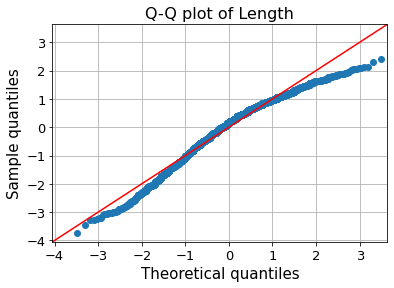

<Figure size 576x360 with 0 Axes>

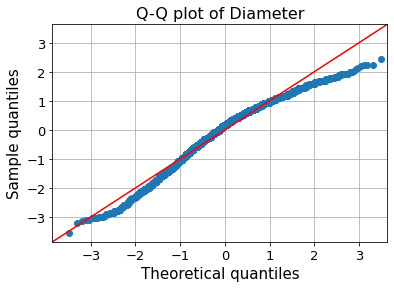

<Figure size 576x360 with 0 Axes>

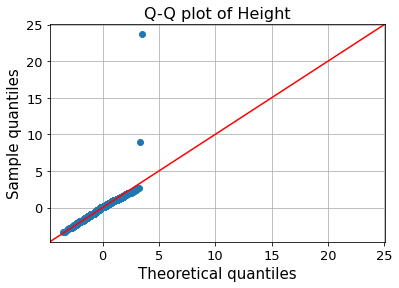

<Figure size 576x360 with 0 Axes>

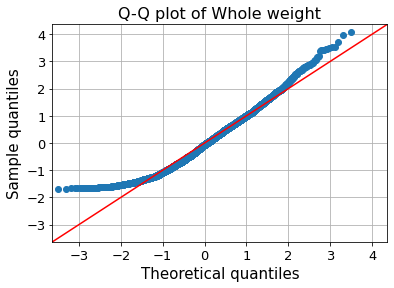

<Figure size 576x360 with 0 Axes>

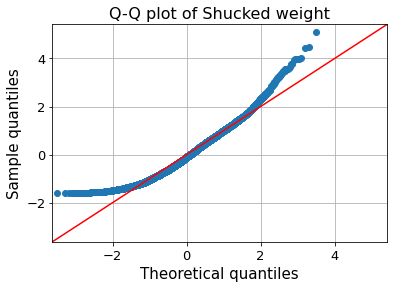

<Figure size 576x360 with 0 Axes>

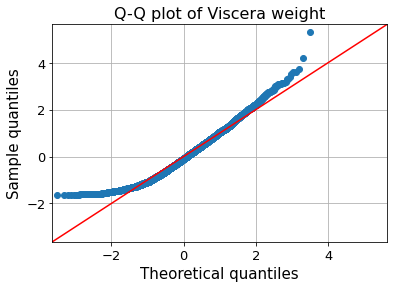

In [6]:
#checking the distribution of independent variables
from statsmodels.graphics.gofplots import qqplot
data_norm=data[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight']]
for c in data_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()


1.	Looking at the Q-Q plot above, it appears that all independent variables are roughly following normal distribution
2.	There are few outliers in few of the predictor variables like in Height, Viscera height and Shucked weight


<AxesSubplot:>

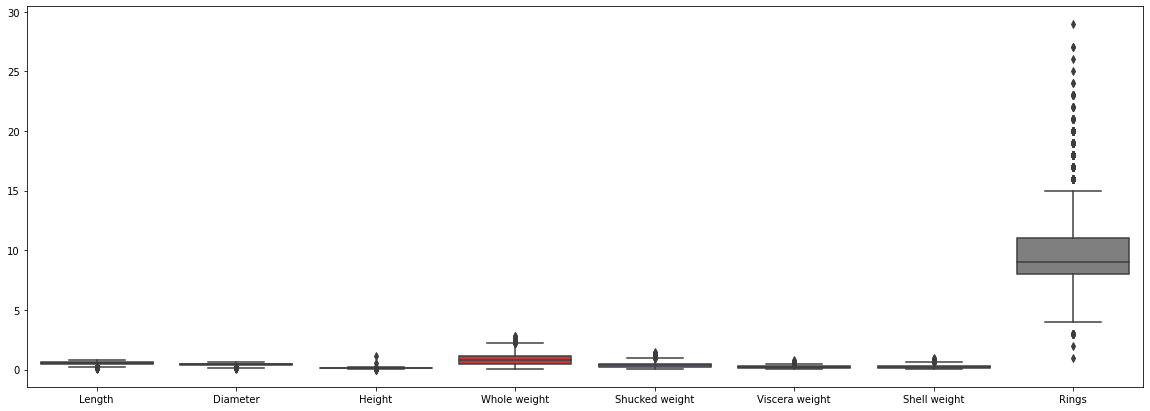

In [7]:
#Checking the Ranges of the predictor variables and dependent variable
plt.figure(figsize=(20,7))
sns.boxplot(data=data)

It is hard to visualize and read data as they are not in same ranges, I'll try to normalize the data for a better understanding and visualization. It will also help later to get normalized coeffiecients when building the Model.

# Data transforming, Feature creation and Analysis

In [8]:
#Creating binary vaiables for sex 

data = pd.get_dummies(data)

# Normalizing the data in the rings column beacuse the value is too high when compared to other independent variable

from sklearn import preprocessing

# Create x to store scaled values as floats
x = data[['Rings']].values.astype(float)

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
data[['Rings']] = pd.DataFrame(x_scaled)



In [9]:
#data after nromalizing and feature creation
data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0.500000,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0.214286,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,0.285714,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0.321429,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0.214286,0,1,0


<AxesSubplot:>

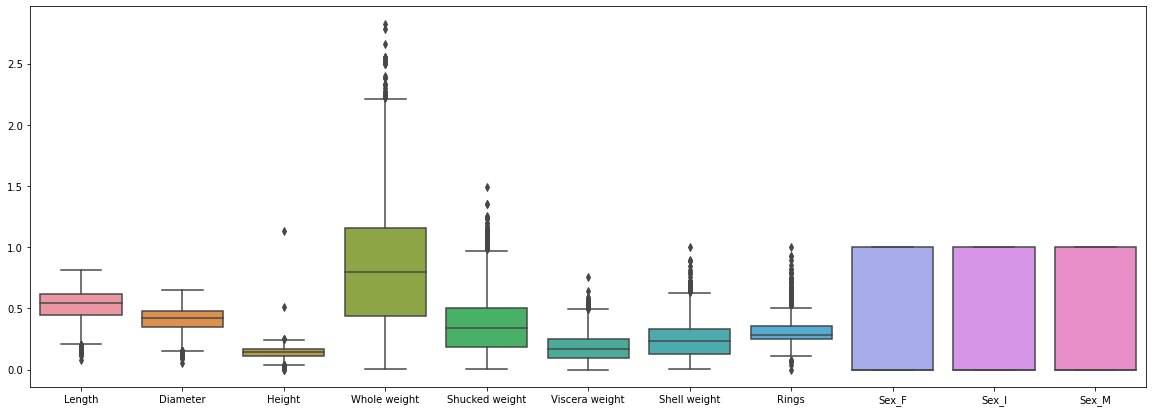

In [10]:
#Checking the Ranges of the predictor variables and dependent variable after normalizing
plt.figure(figsize=(20,7))
sns.boxplot(data=data)

Now it is clear to visualize and interpret the data. Looking at the boxplot above, we can infer below:

1. Height, whole weight, shucked weight, viscera weight has outliers meaning that few abalones survied and grew longer and heavier then expected
2. Few values in independent variables are very small and close to zero which makes sense as the Infant (or younger abalones) will have very small physical attributes
3. Sex have three categorical values - Male, Female and Infant and they are almost evenly distributed meaning almost same number of Male, Female and Infants
4. Most of the Ring values are between 6 and 15 meaning most of the abalones are taken for eating when they are between 7.5 and 16.5 years of age (age = number of rings + 1.5 years)
5. For other variables like height, length, diameter, whole weight (and other weigths) it looks like most of the values lies in between of the respective ranges of the variables, meaning most of the abalones grow untill 15 rings (abalone rings ranges from 1 to 29), this is same inference as observed in above point 


In [11]:
#checking the correlation between all the features in the data
data.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720,0.309666,-0.551465,0.236543
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660,0.318626,-0.564315,0.240376
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467,0.298421,-0.518552,0.215459
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390,0.299741,-0.557592,0.252038
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884,0.263991,-0.521842,0.251793
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819,0.308444,-0.556081,0.242194
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574,0.306319,-0.546953,0.235391
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000,0.250279,-0.436063,0.181831
Sex_F,0.309666,0.318626,0.298421,0.299741,0.263991,0.308444,0.306319,0.250279,1.000000,-0.464298,-0.512528
Sex_I,-0.551465,-0.564315,-0.518552,-0.557592,-0.521842,-0.556081,-0.546953,-0.436063,-0.464298,1.000000,-0.522541


<AxesSubplot:>

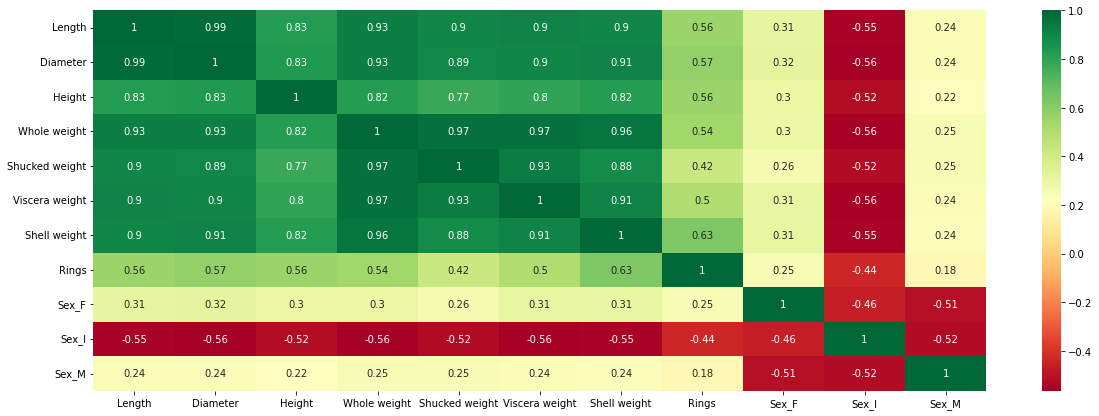

In [12]:
#the heat map of the correlation
plt.figure(figsize=(20,7))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')

We can see there are lot of co-relation among the variables. The co-relation between length and diameter being the highest, it may mean that essentially both are measuring or predicting same thing

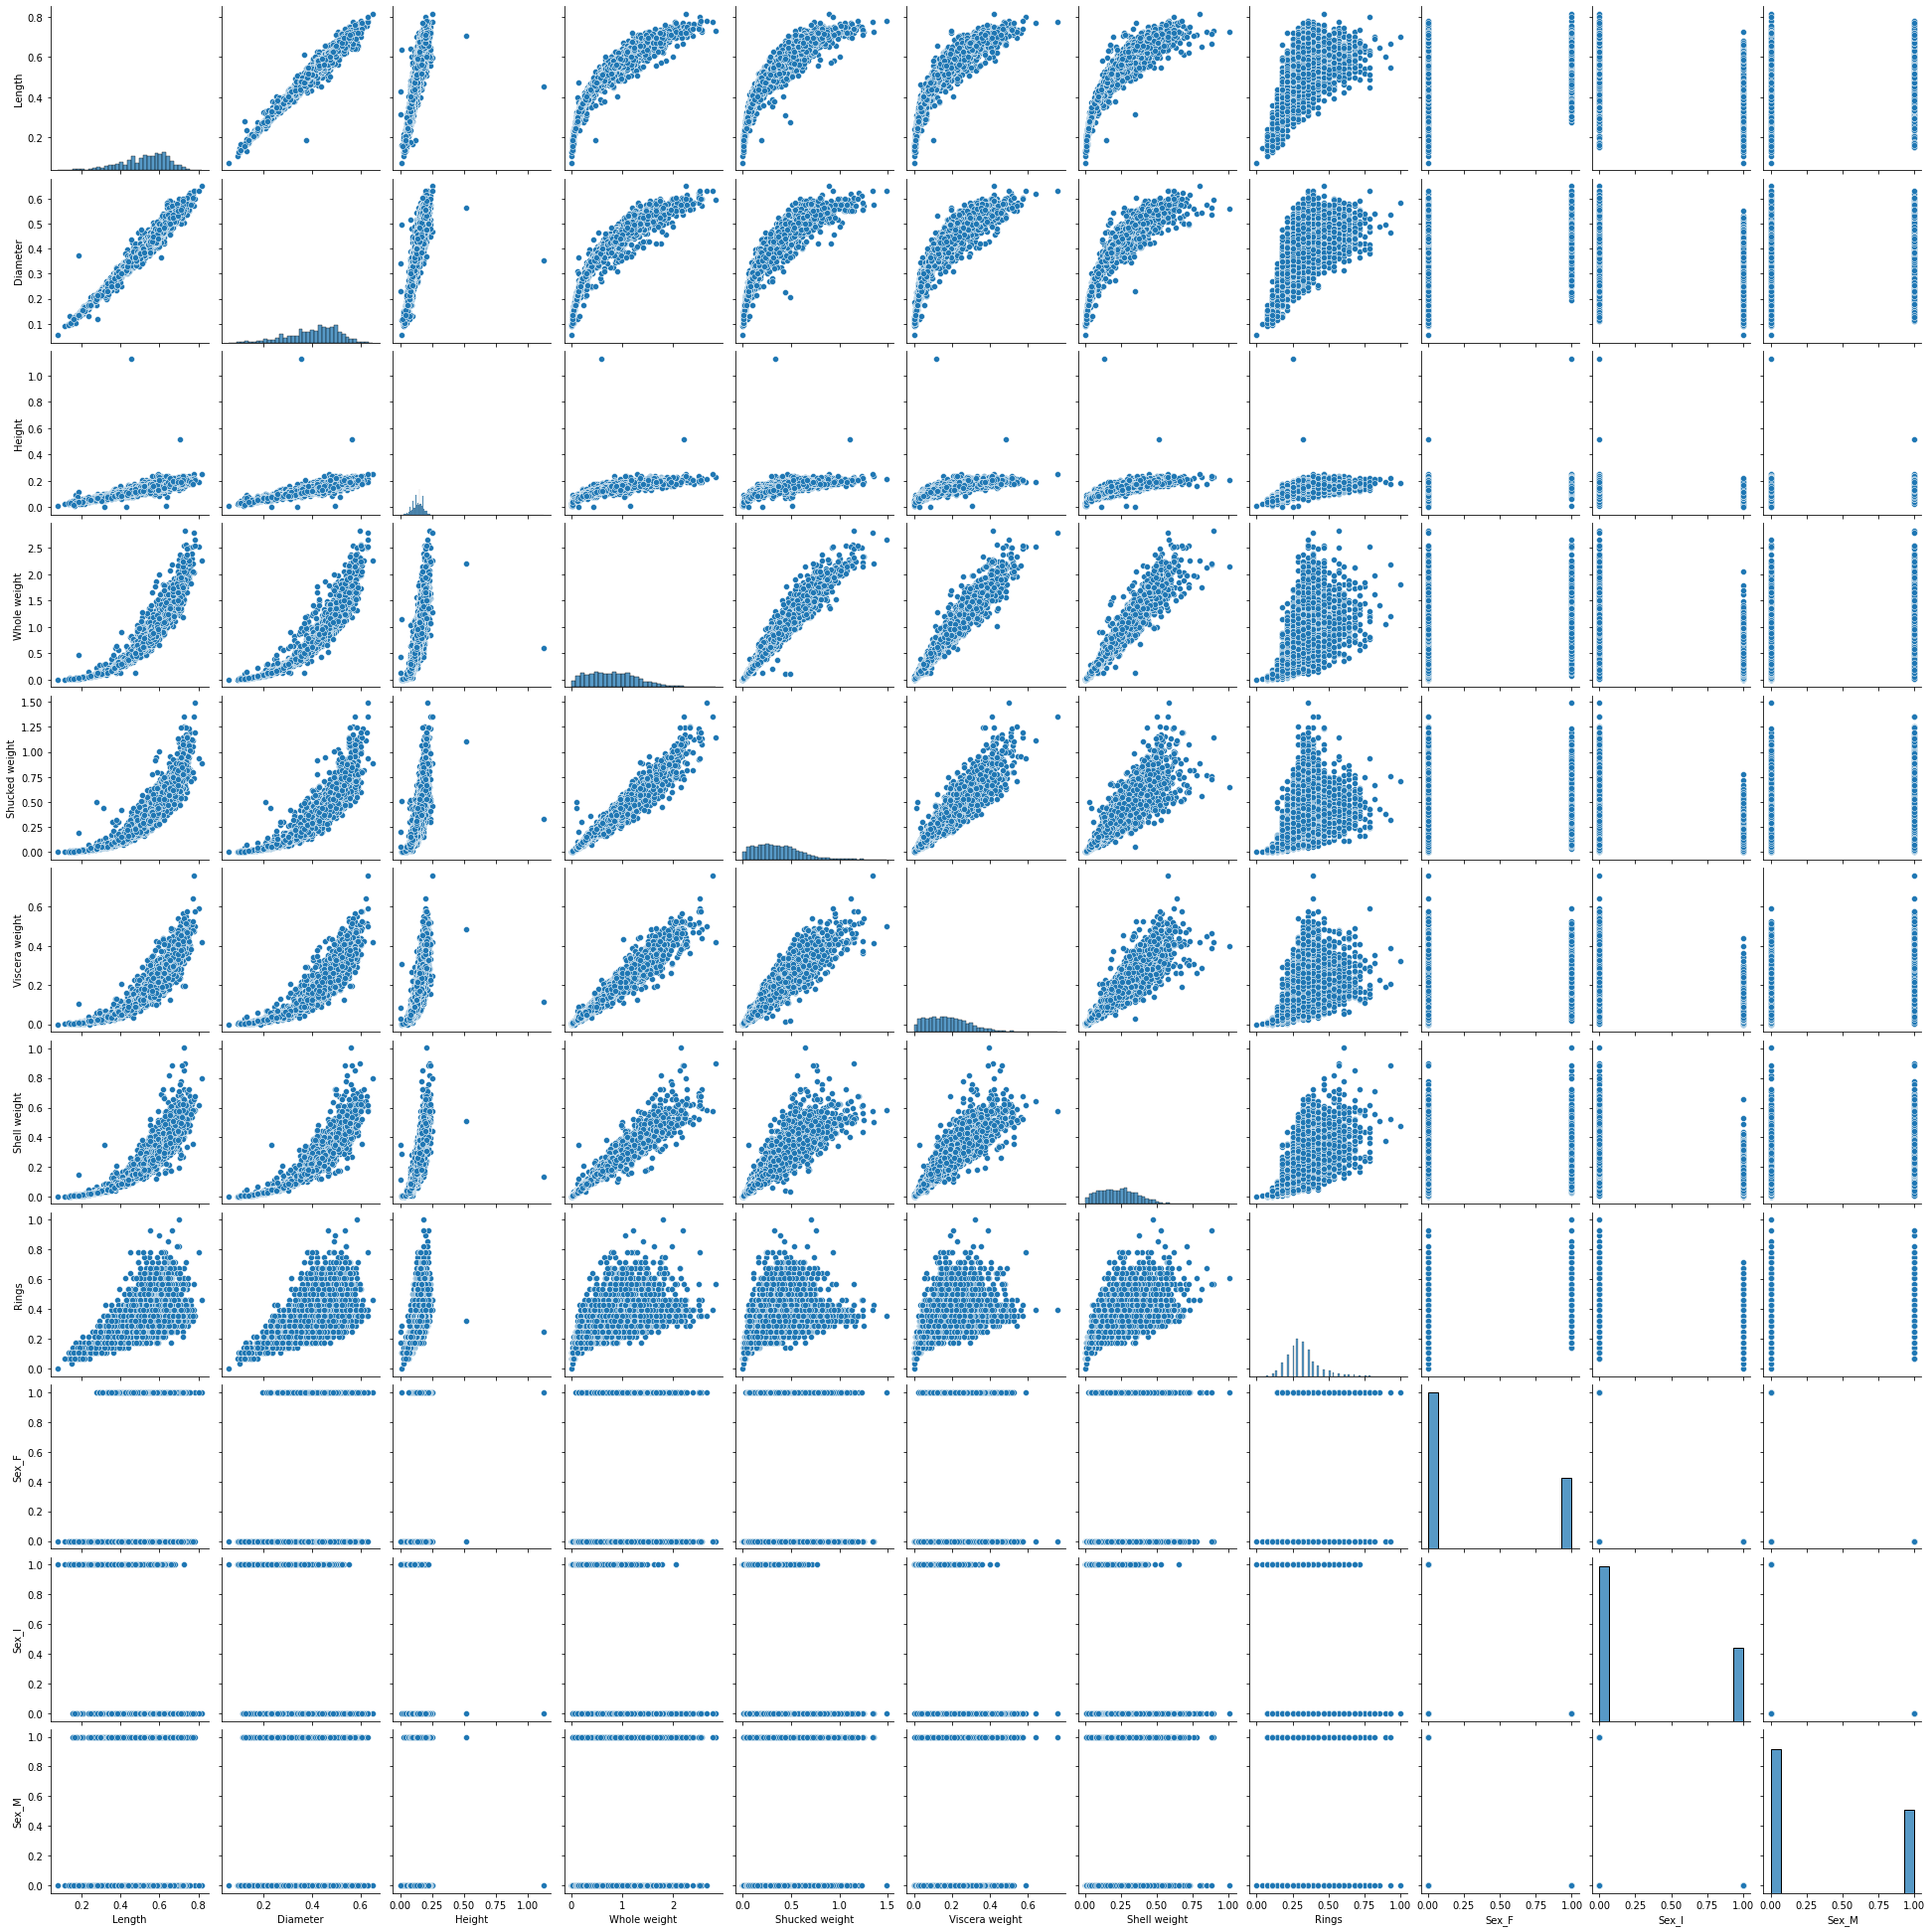

In [13]:
#pair plot to check the colinearity
sns.pairplot(data) 

Correlation matrix and heatmap shows that there is multicollinearity between the independent variables. Heighest correlation is between Length and diameter.

# Identifing predictor significance

In [14]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(data['Rings'], data[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight','Sex_I', 'Sex_M', 'Sex_F']]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     538.9
Date:                Tue, 20 Sep 2022   Prob (F-statistic):               0.00
Time:                        14:36:53   Log-Likelihood:                 4714.5
No. Observations:                4177   AIC:                            -9409.
Df Residuals:                    4167   BIC:                            -9346.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Length            -0.0164      0.065     -0.253      0.800      -0.143       0.110
Diameter           0.3955      0.080      4.972      0.000       0.240       0.551
Height             0.3843      0.055      7.005      0.000       0.277       0.492
Whole weight       0.3206      0.026     12.373      0.000       0.270       0.371
Shucked weight    -0.7067      0.029    -24.209      0.000      -0.764      -0.649
Viscera weight    -0.3779      0.046     -8.179      0.000      -0.469      -0.287
Shell weight       0.3122      0.040      7.772      0.000       0.233       0.391
Sex_I              0.0739      0.010      7.755      0.000       0.055       0.093
Sex_M              0.1054      0.010     10.365      0.000       0.085       0.125
Sex_F              0.1034      0.010      9.928      0.000       0.083       0.124
==============================================================================
Omnibus:                      947.032   Durbin-Watson:                   1.436
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2710.271
Skew:                           1.181   Prob(JB):                         0.00
Kurtosis:                       6.162   Cond. No.                         116.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Considering the significance value of 0.05 because accuracy in predicting the age of the abalone is not that critical

1. The **length** has the p-value 0.8, which is greater and hence it is a non significant feature.
2. The **Diameter** has the p-value 0, which is lesser and hence it is a significant feature.
3. The **Height** has the p-value 0, which is lesser and hence it is a significant feature.
4. The **Whole weight** has the p-value 0, which is lesser and hence it is a significant feature.
5. The **Shucked weight** has the p-value 0, which is lesser and hence it is a significant feature.
6. The **Viscera weight** has the p-value 0, which is lesser and hence it is a significant feature.
7. The **Shell weight** has the p-value 0, which is lesser and hence it is a significant feature.
8. The **Sex_F** has the p-value 0, which is lesser and hence it is a significant feature.
9. The **Sex_I** has the p-value 0, which is lesser and hence it is a significant feature.
10. The **Sex_M** has the p-value 0, which is lesser and hence it is a significant feature.


# Building the Model

##Train ,Validation and Test split

In [15]:
from sklearn.model_selection import  train_test_split

X = data[ ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Sex_F', 'Sex_I', 'Sex_M']]

y = data['Rings']

#Spliting data into Training 76.5%, Validation set 13.5% and Test set 10%

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)

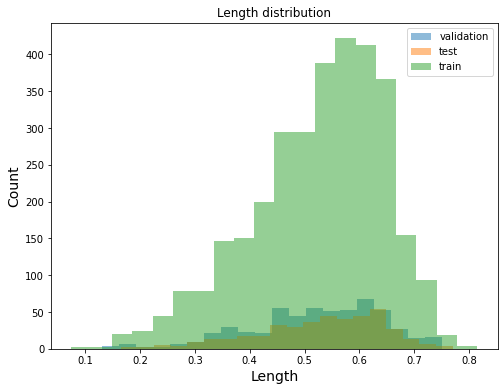

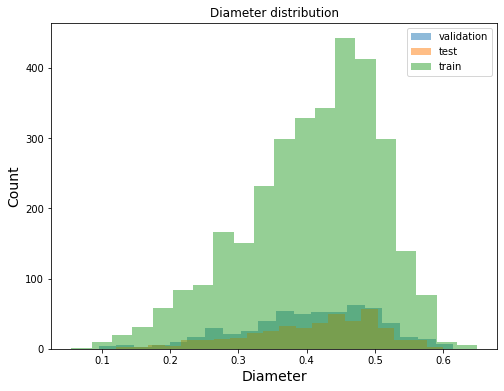

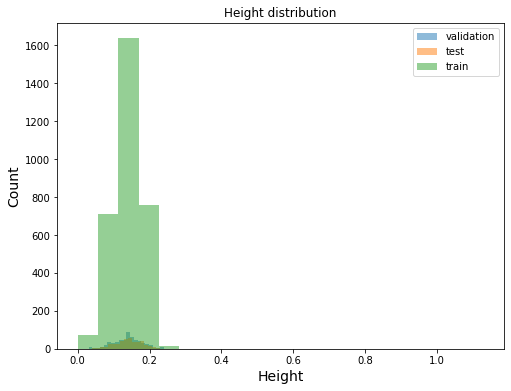

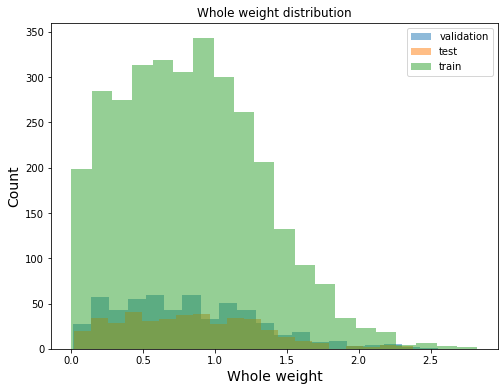

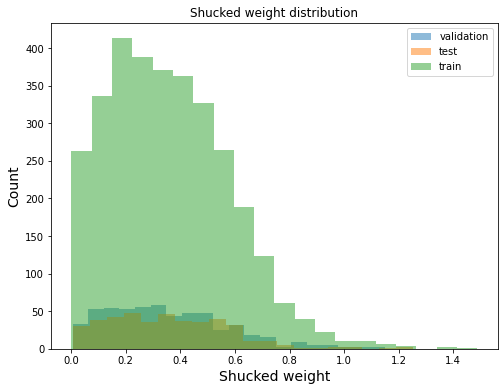

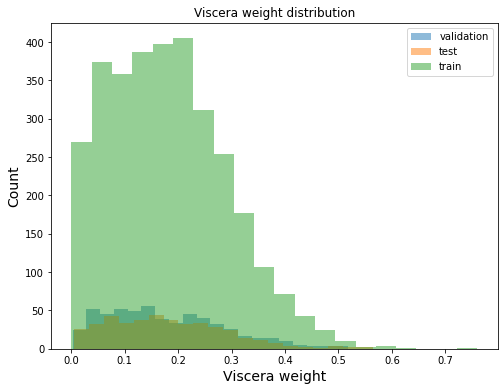

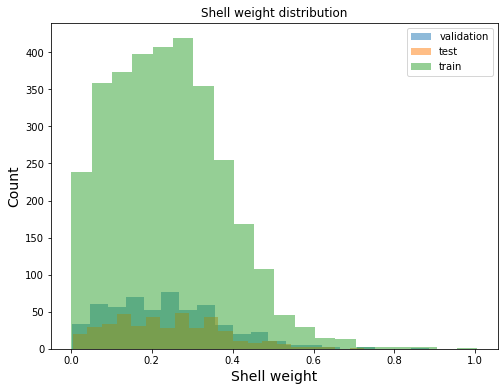

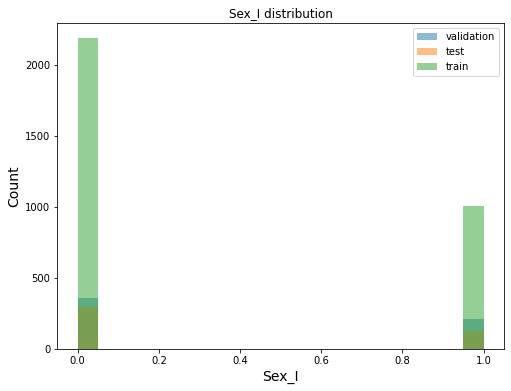

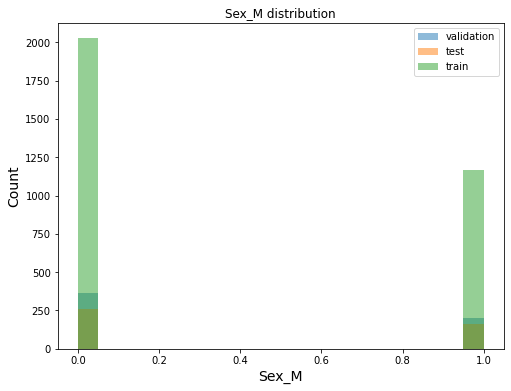

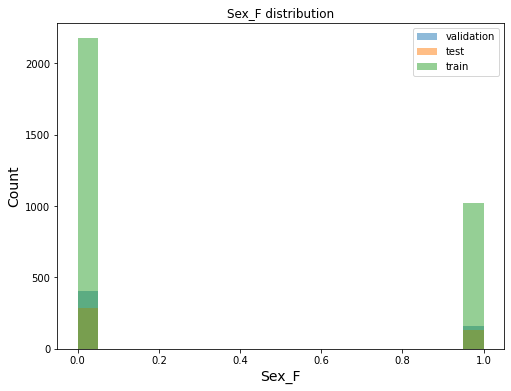

In [16]:
# Looking the data for test, training and validation set
X_test_plot = X_test[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight','Sex_I', 'Sex_M', 'Sex_F']]

X_val_plot = X_val[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight','Sex_I', 'Sex_M', 'Sex_F']]

X_train_plot = X_train[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight','Sex_I', 'Sex_M', 'Sex_F']]

# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
  plt.figure(figsize=(8,6))
  plt.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
  plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
  plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
  plt.xlabel(c, size=14)
  plt.ylabel("Count", size=14)
  plt.legend(loc='upper right')
  plt.title("{} distribution".format(c))
  plt.show()
 

1. The division of dataset in Test, train and validation sets looks fine except few boundary values of Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight' which appears to be missing in test and validation sets
2. No missing values in 'Sex_I', 'Sex_M', 'Sex_F'

## Linear Regression

In [17]:
from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model

In [18]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train,y_train)



LinearRegression()

## Making predictions

In [19]:
# Make predictions using the training set
y_pred = regr.predict(X_train)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_train, y_pred))
r2 = r2_score(y_train,y_pred)
print('R^2 score on tarining set =',r2)

Mean squared error: 0.01
Coefficient of determination: 0.55
R^2 score on tarining set = 0.5468403059477819


In [20]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on test set =',r2)


Mean squared error: 0.01
Coefficient of determination: 0.54
R^2 score on test set = 0.5432754316124072


In [21]:
# Make predictions using the validation set
y_pred = regr.predict(X_val)

# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_val, y_pred))
r2_val = r2_score(y_val,y_pred)
print('R^2 score on validation set =',r2_val)



Mean squared error: 0.01
Coefficient of determination: 0.47
R^2 score on validation set = 0.4675481295977082


## Understanding the important features

In [22]:
#Understanding the important features 
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(regr, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
4.0379 ± 0.4290,Shucked weight
3.8818 ± 0.2313,Whole weight
0.3113 ± 0.0426,Shell weight
0.2895 ± 0.0099,Diameter
0.2382 ± 0.0320,Viscera weight
0.0266 ± 0.0043,Height
0.0145 ± 0.0083,Length
0.0116 ± 0.0040,Sex_I
0.0104 ± 0.0043,Sex_M
0.0003 ± 0.0026,Sex_F


The permutaion importance is also aligned with the P values where length seems to be the lease significant value and rest are significant Sex_M, Sex_F and Sex_I being the top three significant features

#Answer the following questions 

* Which independent variables are useful to predict a target (dependent variable)?
<br>A:
Below is the rank of the dependent variables
1. Sex_M
2. Sex_F
3. Sex_I
4. Shucked Weight 
5. Whole weight
6. Shell weight
7. Diameter
8. Viscera weight
9. Height
10. Length
<br>
* Which independent variables have missing data? How much?
<br>A:
No independent variables have any missing data or zeros.  

* Do the training and test sets have the same data?
<br>A:
Yes, most of the data are same in test, train and validation data set except the data points in training set are more and few boundary values are not included in train and validation data set. 

* In the predictor variables independent of all the other predictor variables?
<br>A:
No, they are not independet of each other. There is multi - collinearity among lot of the independent variable which is shown by the correlation table and pairplot map

* Which predictor variables are the most important?
<br>A:
1. Sex_M
2. Sex_F
3. Sex_I
4. Shucked Weight 
5. Whole weight
6. Shell weight
7. Diameter
8. Viscera weight
9. Height

* Do the ranges of the predictor variables make sense?
<br>A:
1. Height, whole weight, shucked weight, viscera weight has outliers meaning that few abalones survied and grew longer and heavier then expected
2. Few values in independent variables are very small and close to zero which makes sense as the Infant (or younger abalones) will have very small physical attributes
3. Sex have three categorical values - Male, Female and Infant and they are almost evenly distributed meaning almost same number of Male, Female and Infants
4. Most of the Ring values are between 6 and 15 meaning most of the abalones are taken for eating when they are between 7.5 and 16.5 years of age (age = number of rings + 1.5 years)
5. For other variables like height, length, diameter, whole weight (and other weigths) it looks like most of the values lies in between of the respective ranges of the variables, meaning most of the abalones grow untill 15 rings (abalone rings ranges from 1 to 29), this is same inference as observed in above point

* What are the distributions of the predictor variables? 
<br>A:
1. Looking at the Q-Q plots, it appears that all independednt variables are roughly following normal distribution
2. Sex is categorical value and have 3 different values namely Male, Female and Infant

# Conclusion

From the analysis done above on the data set, it is clear that there is multicolinearity and ecxpet length all other dependent variables are significant.



# Refernces

1. Sckit learn offcial documentation
2. Refered Towards Data Science
3. Eli5 official documentation 

The algorithms were referred directly from the **Sckit learn official documentation**. Visualization was referred from the  Machine Learning with scikit-learn Quick Start Guide and **Towards Data Science** (How do you check the quality of your regression model in Python?).  The remaining code was written independently. Feature importance reference is taken from **eli5 offical documnetation** 









Copyright 2021 AI Skunks


Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.